In [74]:
import numpy as np
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline 

data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)


(2580, 81)
(2579, 81)


In [75]:
print(data.nunique().head())

PID           2579
GrLivArea     1213
SalePrice      870
MSSubClass      16
MSZoning         7
dtype: int64


In [78]:
data["SalePricePerGLA"] = data["SalePrice"] / data["GrLivArea"]
describe_df = data.describe(include='all')
describe_df.to_csv(r'describe_df.csv', index = True)
describe_df.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA
count,2.579000e+03,2579.000000,2579.000000,2579.000000,2579,2117.000000,2579.000000,2579,168,2579,...,2579.000000,9,525,97,2579.000000,2579.000000,2579.000000,2579,2579,2579.000000
unique,NaN,NaN,NaN,NaN,7,NaN,NaN,2,2,4,...,NaN,4,4,4,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,...,NaN,TA,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,NaN,2007,NaN,NaN,2569,105,1640,...,NaN,3,301,88,NaN,NaN,NaN,2391,2413,NaN
mean,7.147546e+08,1485.950368,178053.442420,57.694843,NaN,68.510628,10119.269484,NaN,NaN,NaN,...,1.662660,NaN,NaN,NaN,48.750291,6.152385,2007.839085,NaN,NaN,120.907035
std,1.886603e+08,488.723768,75044.983207,42.810137,NaN,22.839861,8128.389882,NaN,NaN,NaN,...,30.345262,NaN,NaN,NaN,498.820852,2.669913,1.312088,NaN,NaN,30.644322
min,5.263011e+08,334.000000,12789.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,15.371394
25%,5.313630e+08,1112.000000,129950.000000,20.000000,NaN,57.000000,7406.500000,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,100.363645
50%,5.354542e+08,1436.000000,159900.000000,50.000000,NaN,68.000000,9382.000000,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,119.658120
75%,9.071806e+08,1733.000000,209750.000000,70.000000,NaN,80.000000,11485.500000,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,138.888889


In [84]:
0        MSSubClass
1          MSZoning
2            Street
3             Alley
4          LotShape
5       LandContour
6         Utilities
7         LotConfig
8         LandSlope
9      Neighborhood
10       Condition1
11       Condition2
12         BldgType
13       HouseStyle
14      OverallQual
15      OverallCond
16        RoofStyle
17         RoofMatl
18      Exterior1st
19      Exterior2nd
20       MasVnrType
21        ExterQual
22        ExterCond
23       Foundation
24         BsmtQual
25         BsmtCond
26     BsmtExposure
27     BsmtFinType1
28     BsmtFinType2
29          Heating
30        HeatingQC
31       CentralAir
32       Electrical
33      KitchenQual
34       Functional
35      FireplaceQu
36       GarageType
37     GarageFinish
38       GarageQual
39       GarageCond
40       PavedDrive
41           PoolQC
42            Fence
43      MiscFeature
44         SaleType
45    SaleCondition

numericaldata = data[['GrLivArea', 'SalePrice','LotFrontage', 'LotArea',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'YrSold', 'SalePricePerGLA']]
categoricaldata = data[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
    'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
    'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
    'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']]
#print(cat_data.shape)
cat_features = categoricaldata.columns
print(cat_features.shape)
print(cat_features)
# Nixon features: BsmtCond, MiscFeature(?), Electrical(?), LandContour, PavedDrive(?), LandSlope(?), 
#    Utilities, Alley(?), Street
# Aleksey features: SaleType, Condition1, Condition2, RoofMatl, Functional, Heating, 
#    BsmtFinType2, SaleCondition, ExterCond, GarageQual
# Completed: SaleCondition
0        MSSubClass
1          MSZoning
2            Street
3             Alley
4          LotShape
5       LandContour
6         Utilities
7         LotConfig
8         LandSlope
9      Neighborhood
10       Condition1
11       Condition2
12         BldgType
13       HouseStyle
14      OverallQual
15      OverallCond
16        RoofStyle
17         RoofMatl
18      Exterior1st
19      Exterior2nd
20       MasVnrType
21        ExterQual
22        ExterCond
23       Foundation
24         BsmtQual
25         BsmtCond
26     BsmtExposure
27     BsmtFinType1
28     BsmtFinType2
29          Heating
30        HeatingQC
31       CentralAir
32       Electrical
33     BsmtFullBath
34     BsmtHalfBath
35         FullBath
36         HalfBath
37     BedroomAbvGr
38     KitchenAbvGr
39      KitchenQual
40     TotRmsAbvGrd
41       Functional
42      FireplaceQu
43       GarageType
44     GarageFinish
45       GarageQual
46       GarageCond
47       PavedDrive
48           PoolQC
49            Fence
50      MiscFeature
51         SaleType
52    SaleCondition

(54,)
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')


In [80]:
#get all columns with unique values from describe
unique_s = describe_df.iloc[1, :]
#print(unique_s.head())
unique_s.sort_values(inplace=True, ascending=False)
#print(unique_s.head())
feat_uniq = unique_s[unique_s >= 0].index

print("Manual cat features: ", categoricaldata.shape)
print("Length of unique features via describe: ", len(feat_uniq))
# for col in feat_uniq:
#     print("Feature is: ", col)
#     print(data[col].unique())
#     data[col].value_counts().sort_index().plot(kind='barh', rot=0)
#     plt.show()

    
print(feat_uniq)

Manual cat features:  (2579, 54)
Length of unique features via describe:  43


Index(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType', 'Condition1',
       'Condition2', 'HouseStyle', 'MSZoning', 'RoofMatl', 'Functional',
       'Heating', 'RoofStyle', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'SaleCondition', 'GarageType', 'HeatingQC', 'ExterCond', 'LotConfig',
       'BldgType', 'GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual',
       'BsmtCond', 'BsmtQual', 'MasVnrType', 'BsmtExposure', 'PoolQC',
       'ExterQual', 'MiscFeature', 'Electrical', 'LandContour', 'LotShape',
       'Fence', 'GarageFinish', 'PavedDrive', 'LandSlope', 'CentralAir',
       'Utilities', 'Alley', 'Street'],
      dtype='object')


In [6]:
numericaldata = data[['GrLivArea', 'SalePrice','LotFrontage', 'LotArea',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'YrSold', 'SalePricePerGLA']]

al_features = ["SaleType", "Condition1", "Condition2", "RoofMatl","Functional", "Heating",
              "BsmtFinType2", "SaleCondition", "ExterCond", "GarageQual"]

SaleType: Type of sale
WD	Warranty Deed - Conventional
CWD	Warranty Deed - Cash
VWD	Warranty Deed - VA Loan
New	Home just constructed and sold
COD	Court Officer Deed/Estate
Con	Contract 15% Down payment regular terms
ConLw	Contract Low Down payment and low interest
ConLI	Contract Low Interest
ConLD	Contract Low Down
Oth	Other
          SaleType      SalePrice  SalePricePerGLA
SaleType                                          
COD             50  132694.200000        99.847579
CWD             11  188622.727273       128.659670
Con              5  224446.000000       155.262208
ConLD           23  131284.913043       104.091547
ConLI            7  207992.857143       122.154354
ConLw            8  121937.500000       103.250167
New             79  287670.329114       160.254445
Oth              4  103572.750000        98.797810
VWD              1  137000.000000       116.496599
WD            2391  175926.301966       120.195868


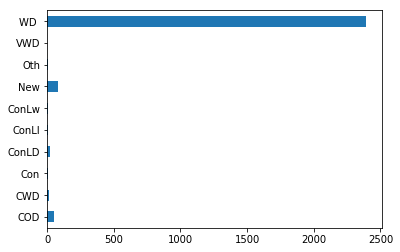

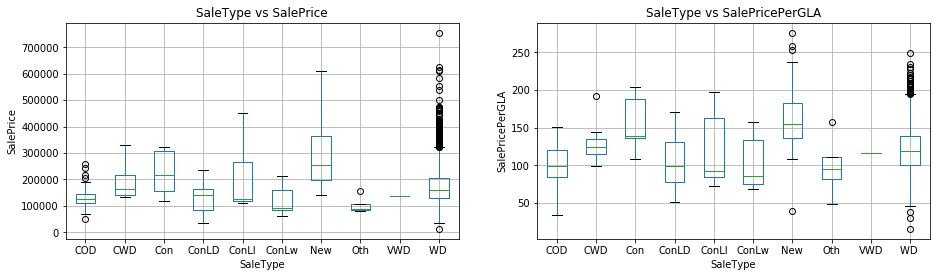

,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
SaleType,,,,,,,,,,,,,
COD,1362.000000,132694.200000,65.928571,9560.480000,1956.420000,1965.980000,78.260000,281.660000,108.020000,633.480000,1023.160000,1145.860000,199.920000
CWD,1454.545455,188622.727273,64.444444,10071.090909,1966.000000,1981.181818,47.181818,411.181818,67.909091,601.272727,1080.363636,1196.363636,258.181818
Con,1417.800000,224446.000000,56.600000,11489.200000,1985.200000,1987.400000,19.200000,781.800000,86.400000,278.000000,1146.200000,1150.800000,267.000000
ConLD,1284.608696,131284.913043,75.285714,9750.956522,1958.000000,1973.565217,77.130435,335.954545,11.227273,518.590909,865.772727,1066.652174,217.956522
ConLI,1653.428571,207992.857143,75.166667,9895.285714,1970.285714,1986.000000,148.571429,588.142857,0.000000,657.428571,1245.571429,1257.285714,333.857143
ConLw,1196.625000,121937.500000,52.625000,7801.625000,1945.375000,1963.000000,20.750000,265.875000,146.500000,288.625000,701.000000,829.125000,367.500000
New,1803.544304,287670.329114,75.730769,11298.405063,2006.481013,2006.974684,199.644737,583.075949,0.000000,884.037975,1467.113924,1484.518987,319.025316
Oth,1138.750000,103572.750000,72.750000,10054.500000,1956.750000,1974.250000,36.000000,428.000000,0.000000,558.000000,986.000000,1138.750000,0.000000
VWD,1176.000000,137000.000000,85.000000,13770.000000,1958.000000,1998.000000,340.000000,190.000000,873.000000,95.000000,1158.000000,1176.000000,0.000000


In [20]:
# Aleksey features: SaleType
print("SaleType: Type of sale")
print("WD\tWarranty Deed - Conventional")
print("CWD\tWarranty Deed - Cash")
print("VWD\tWarranty Deed - VA Loan")
print("New\tHome just constructed and sold")
print("COD\tCourt Officer Deed/Estate")
print("Con\tContract 15% Down payment regular terms")
print("ConLw\tContract Low Down payment and low interest")
print("ConLI\tContract Low Interest")
print("ConLD\tContract Low Down")
print("Oth\tOther")

feature = al_features[0]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

data.loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
#data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

Condition1: Proximity to various conditions
Artery	Adjacent to arterial street
Feedr	Adjacent to feeder street
Norm	Normal
RRNn	Within 200' of North-South Railroad
RRAn	Adjacent to North-South Railroad
PosN	Near positive off-site feature--park, greenbelt, etc.
PosA	Adjacent to postive off-site feature
RRNe	Within 200' of East-West Railroad
RRAe	Adjacent to East-West Railroad
            Condition1      SalePrice  SalePricePerGLA
Condition1                                            
Artery              81  129891.975309        91.730548
Feedr              137  141343.802920       105.147478
Norm              2227  180956.537045       122.903755
PosA                19  246650.000000       124.558120
PosN                37  237920.459459       128.846897
RRAe                26  138650.000000       119.723390
RRAn                40  177734.050000       116.770483
RRNe                 4  150337.500000       117.782814
RRNn                 8  189906.250000       111.063180


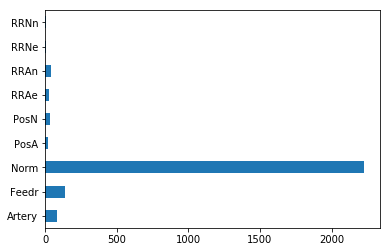

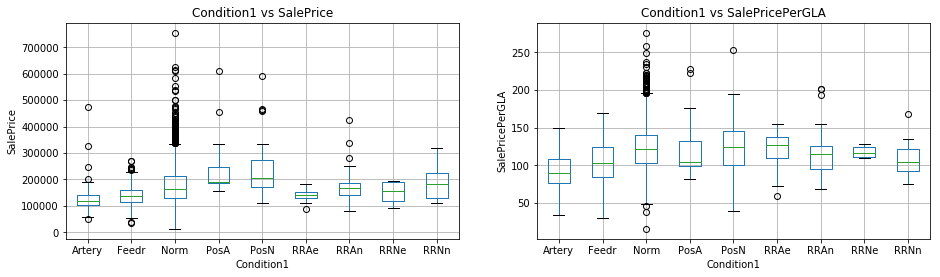

,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePricePerGLA
Condition1,,,,,,,,,,,,,
Artery,0.444444,1952.600000,1.370370,376.271605,48.839506,46.790123,57.765432,4.395062,12.740741,6.925926,44.444444,2008.049383,91.730548
Feedr,0.569343,1962.523810,1.518248,416.328467,82.328467,38.540146,36.379562,1.182482,11.306569,3.240876,113.321168,2007.919708,105.147478
Norm,0.607544,1978.425071,1.763252,470.070530,98.324652,45.203413,21.577458,2.267176,16.065559,1.241132,46.363718,2007.830265,122.903755
PosA,1.210526,1970.578947,2.052632,552.052632,122.157895,82.578947,20.684211,0.000000,63.736842,0.000000,0.000000,2007.736842,124.558120
PosN,1.000000,1981.459459,2.135135,600.702703,150.135135,87.945946,25.972973,13.675676,31.108108,0.000000,9.459459,2008.162162,128.846897
RRAe,0.192308,1982.083333,1.615385,439.769231,49.538462,43.269231,9.384615,0.000000,0.000000,0.000000,15.384615,2007.615385,119.723390
RRAn,0.525000,1986.100000,1.950000,488.600000,74.875000,63.100000,10.275000,0.000000,24.075000,12.975000,65.000000,2007.375000,116.770483
RRNe,0.000000,1970.250000,1.750000,428.250000,128.500000,35.000000,21.000000,59.500000,0.000000,0.000000,0.000000,2008.000000,117.782814
RRNn,0.625000,1976.875000,2.125000,534.875000,74.500000,68.750000,10.500000,21.000000,0.000000,0.000000,0.000000,2008.500000,111.063180


In [8]:
# Aleksey features Condition1
#print("")
print("Condition1: Proximity to various conditions")
print("Artery\tAdjacent to arterial street")
print("Feedr\tAdjacent to feeder street")
print("Norm\tNormal")
print("RRNn\tWithin 200' of North-South Railroad")
print("RRAn\tAdjacent to North-South Railroad")
print("PosN\tNear positive off-site feature--park, greenbelt, etc.")
print("PosA\tAdjacent to postive off-site feature")
print("RRNe\tWithin 200' of East-West Railroad")
print("RRAe\tAdjacent to East-West Railroad")
feature = al_features[1]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

data.loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

Condition2: Proximity to various conditions (if more than one is present)
Artery	Adjacent to arterial street
Feedr	Adjacent to feeder street	
Norm	Normal	
RRNn	Within 200' of North-South Railroad
RRAn	Adjacent to North-South Railroad
PosN	Near positive off-site feature--park, greenbelt, etc.
PosA	Adjacent to postive off-site feature
RRNe	Within 200' of East-West Railroad
RRAe	Adjacent to East-West Railroad
            Condition2      SalePrice  SalePricePerGLA
Condition2                                            
Artery               3  130750.000000       110.878686
Feedr               12  132741.666667        94.323322
Norm              2554  177884.699687       120.957959
PosA                 3  463333.333333       189.353515
PosN                 3  328916.666667       140.927903
RRAe                 1  190000.000000        72.519084
RRAn                 1  136905.000000        81.491071
RRNn                 2   96750.000000       141.622960


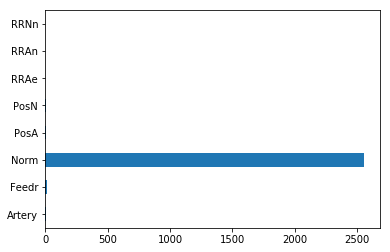

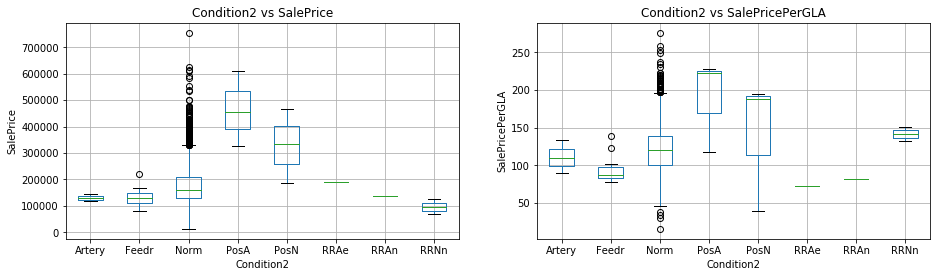

,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePricePerGLA
Condition2,,,,,,,,,,,,,
Artery,0.666667,1944.500000,0.666667,171.000000,0.000000,29.666667,0.000000,0.000000,0.000000,0.000000,0.000000,2007.666667,110.878686
Feedr,0.083333,1962.916667,1.583333,429.416667,78.833333,49.250000,12.333333,0.000000,0.000000,0.000000,83.333333,2007.666667,94.323322
Norm,0.605325,1977.057708,1.747748,466.596553,95.945184,45.756460,23.301879,2.536805,16.252937,1.678935,45.586139,2007.840251,120.957959
PosA,1.333333,2000.666667,2.666667,788.666667,235.000000,201.333333,0.000000,0.000000,58.000000,0.000000,0.000000,2008.000000,189.353515
PosN,1.333333,2006.333333,2.666667,745.333333,144.666667,226.666667,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,140.927903
RRAe,1.000000,1977.000000,2.000000,600.000000,155.000000,24.000000,145.000000,0.000000,0.000000,0.000000,8300.000000,2007.000000,72.519084
RRAn,0.000000,1976.000000,2.000000,528.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,81.491071
RRNn,0.000000,1941.500000,1.500000,480.000000,94.500000,25.000000,43.500000,0.000000,0.000000,0.000000,0.000000,2008.000000,141.622960


In [9]:
# Aleksey features Condition2
#print("\t\n")
print("Condition2: Proximity to various conditions (if more than one is present)")
print("Artery	Adjacent to arterial street")
print("Feedr	Adjacent to feeder street	")
print("Norm	Normal	")
print("RRNn	Within 200' of North-South Railroad")
print("RRAn	Adjacent to North-South Railroad")
print("PosN	Near positive off-site feature--park, greenbelt, etc.")
print("PosA	Adjacent to postive off-site feature")
print("RRNe	Within 200' of East-West Railroad")
print("RRAe	Adjacent to East-West Railroad")

feature = al_features[2]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

data.loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

RoofMatl: Roof material
ClyTile	Clay or Tile
CompShg	Standard (Composite) Shingle
Membran	Membrane
Metal	Metal
Roll	Roll
Tar&Grv	Gravel & Tar
WdShake	Wood Shakes
WdShngl	Wood Shingles
          RoofMatl      SalePrice  SalePricePerGLA
RoofMatl                                          
CompShg       2543  177282.276052       120.825871
Membran          1  241500.000000       177.182685
Metal            1  180000.000000       182.186235
Roll             1  137000.000000        71.354167
Tar&Grv         18  185166.666667       118.771895
WdShake          8  232375.000000       112.145949
WdShngl          7  374357.142857       156.181288


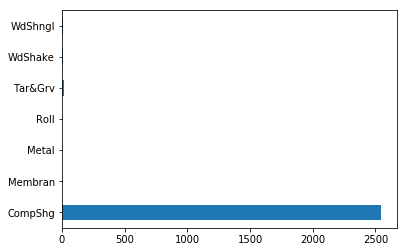

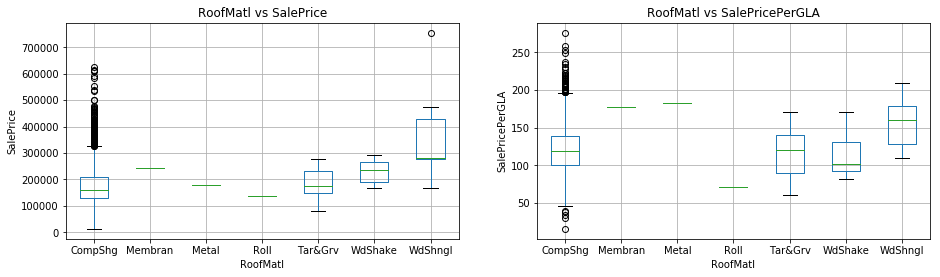

,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
RoofMatl,,,,,,,,,,,,,
CompShg,1480.533228,177282.276052,68.195215,9994.543059,1970.381832,1983.845851,98.551997,442.852085,50.895751,540.513375,1034.261212,1139.906803,336.545026
Membran,1363.000000,241500.000000,73.000000,39104.000000,1954.000000,2005.000000,0.000000,226.000000,1063.000000,96.000000,1385.000000,1363.000000,0.000000
Metal,988.000000,180000.000000,NaN,21453.000000,1969.000000,1969.000000,0.000000,938.000000,0.000000,0.000000,938.000000,988.000000,0.000000
Roll,1920.000000,137000.000000,95.000000,11345.000000,1948.000000,1950.000000,567.000000,220.000000,0.000000,708.000000,928.000000,928.000000,992.000000
Tar&Grv,1605.500000,185166.666667,95.538462,15928.888889,1964.444444,1975.388889,88.944444,517.888889,264.444444,326.666667,1109.000000,1452.500000,153.000000
WdShake,2148.000000,232375.000000,91.600000,14831.250000,1974.375000,1982.250000,248.750000,404.000000,106.500000,582.625000,1093.125000,1468.750000,679.250000
WdShngl,2416.571429,374357.142857,91.571429,29171.571429,1966.142857,1981.571429,204.142857,814.142857,178.714286,673.428571,1666.285714,1850.571429,484.285714


In [21]:
# Aleksey features RoofMatl
#print("")
print("RoofMatl: Roof material")
print("ClyTile	Clay or Tile")
print("CompShg	Standard (Composite) Shingle")
print("Membran	Membrane")
print("Metal	Metal")
print("Roll	Roll")
print("Tar&Grv	Gravel & Tar")
print("WdShake	Wood Shakes")
print("WdShngl	Wood Shingles")

feature = al_features[3]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

data.loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
#data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

Functional: Home functionality (Assume typical unless deductions are warranted)
Typ	Typical Functionality
Min1	Minor Deductions 1
Min2	Minor Deductions 2
Mod	Moderate Deductions
Maj1	Major Deductions 1
Maj2	Major Deductions 2
Sev	Severely Damaged
Sal	Salvage only
            Functional      SalePrice  SalePricePerGLA
Functional                                            
Maj1                18  150091.666667        83.453814
Maj2                 7   98300.571429        77.816710
Min1                57  148425.438596       100.306791
Min2                66  150783.818182        92.989756
Mod                 32  158366.062500        91.222256
Sal                  1   50000.000000        33.692722
Typ               2398  180267.046706       123.004480


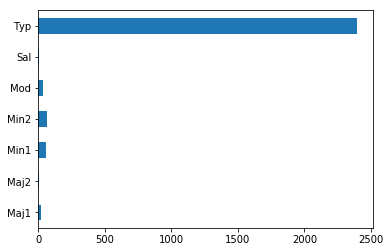

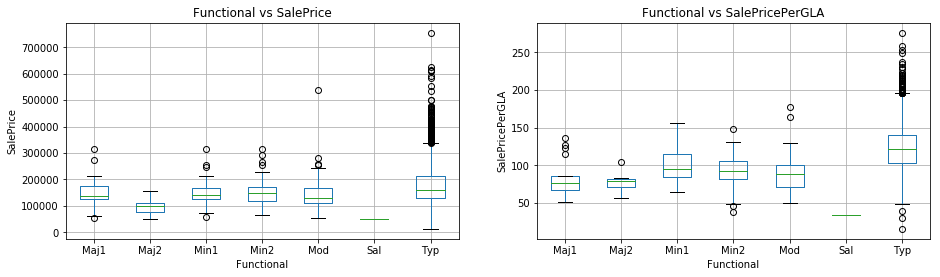

,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
Functional,,,,,,,,,,,,,
Maj1,1795.277778,150091.666667,61.133333,11545.166667,1960.500000,1980.388889,27.722222,333.888889,131.666667,621.333333,1086.888889,1248.444444,520.222222
Maj2,1273.428571,98300.571429,71.428571,10125.000000,1942.000000,1980.571429,30.857143,79.857143,138.857143,469.142857,687.857143,1099.857143,76.714286
Min1,1502.192982,148425.438596,74.893617,12879.649123,1954.368421,1977.070175,57.087719,427.824561,105.052632,340.947368,873.824561,1316.087719,167.140351
Min2,1654.515152,150783.818182,68.634615,11586.787879,1948.984848,1975.000000,44.924242,313.757576,66.272727,483.106061,863.136364,1229.424242,406.787879
Mod,1736.312500,158366.062500,78.555556,16137.812500,1948.937500,1977.500000,52.125000,387.250000,80.187500,429.250000,896.687500,1353.937500,382.375000
Sal,1484.000000,50000.000000,60.000000,10320.000000,1910.000000,1950.000000,0.000000,0.000000,0.000000,771.000000,771.000000,866.000000,504.000000
Typ,1475.883236,180267.046706,68.267276,9922.147623,1971.759383,1984.297748,103.281460,451.110555,50.493534,546.412182,1048.016270,1135.274812,337.526272


In [22]:
# Aleksey feature Functional
#print("")
print("Functional: Home functionality (Assume typical unless deductions are warranted)")
print("Typ	Typical Functionality")
print("Min1	Minor Deductions 1")
print("Min2	Minor Deductions 2")
print("Mod	Moderate Deductions")
print("Maj1	Major Deductions 1")
print("Maj2	Major Deductions 2")
print("Sev	Severely Damaged")
print("Sal	Salvage only")

feature = al_features[4]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

data.loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
#data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

Heating: Type of heating
Floor	Floor Furnace
GasA	Gas forced warm air furnace
GasW	Gas hot water or steam heat
Grav	Gravity furnace	
OthW	Hot water or steam heat other than gas
Wall	Wall furnace
         Heating      SalePrice  SalePricePerGLA
Heating                                         
Floor          1   72500.000000       100.694444
GasA        2539  178701.515951       121.364117
GasW          25  162555.160000        97.653357
Grav           7   91285.714286        88.099412
OthW           2  125750.000000        57.331966
Wall           5   89960.000000        80.472682


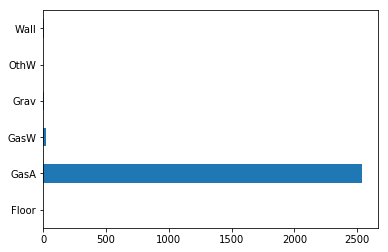

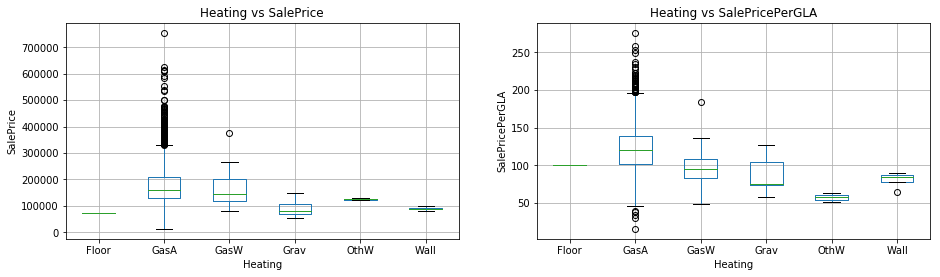

,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
Heating,,,,,,,,,,,,,
Floor,720.000000,72500.000000,NaN,6627.000000,1949.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,720.000000,0.00000
GasA,1485.233557,178701.515951,68.451225,10031.119338,1970.965341,1984.051201,100.651485,446.998424,53.342396,539.685973,1040.026793,1146.426152,334.57503
GasW,1703.480000,162555.160000,75.458333,20140.560000,1928.040000,1973.480000,13.600000,383.520000,76.800000,599.280000,1059.600000,1132.840000,570.64000
Grav,1120.857143,91285.714286,73.166667,8908.000000,1929.571429,1950.000000,0.000000,102.714286,0.000000,642.571429,745.285714,824.857143,296.00000
OthW,2208.000000,125750.000000,55.000000,7425.000000,1894.500000,1968.500000,0.000000,289.000000,0.000000,420.500000,709.500000,1036.000000,1069.50000
Wall,1137.800000,89960.000000,57.500000,8247.400000,1948.600000,1950.000000,68.000000,0.000000,0.000000,0.000000,0.000000,1049.600000,88.20000


In [23]:
# Aleksey feature Heating
#print("")
print("Heating: Type of heating")
print("Floor	Floor Furnace")
print("GasA	Gas forced warm air furnace")
print("GasW	Gas hot water or steam heat")
print("Grav	Gravity furnace	")
print("OthW	Hot water or steam heat other than gas")
print("Wall	Wall furnace")

feature = al_features[5]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

data.loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
#data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

BsmtFinType2: Rating of basement finished area (if multiple types)
GLQ	Good Living Quarters
ALQ	Average Living Quarters
BLQ	Below Average Living Quarters	
Rec	Average Rec Room
LwQ	Low Quality
Unf	Unfinshed
NA	No Basement
              BsmtFinType2      SalePrice  SalePricePerGLA
BsmtFinType2                                              
ALQ                     53  188644.339623       134.012955
BLQ                     64  161466.140625       121.914004
GLQ                     32  211278.125000       137.985798
LwQ                     84  160725.297619       121.082267
Rec                     97  164338.402062       120.432344
Unf                   2179  181201.023864       121.368262


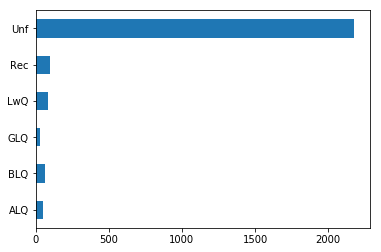

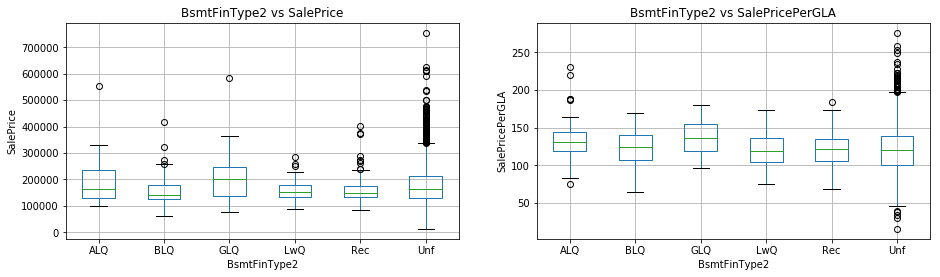

,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePricePerGLA
BsmtFinType2,,,,,,,,,,,,,
ALQ,0.679245,1973.403846,1.641509,455.018868,143.245283,44.018868,31.283019,4.245283,18.943396,0.000000,7.547170,2007.962264,134.012955
BLQ,0.656250,1971.841270,1.609375,447.296875,97.718750,33.515625,22.781250,0.000000,18.593750,12.500000,47.968750,2007.859375,121.914004
GLQ,0.656250,1983.666667,1.968750,519.968750,158.750000,54.812500,16.375000,0.000000,16.250000,0.000000,53.125000,2007.937500,137.985798
LwQ,0.666667,1972.047619,1.738095,481.535714,127.142857,36.023810,16.750000,0.000000,35.190476,13.892857,39.642857,2007.785714,121.082267
Rec,0.731959,1968.645833,1.587629,449.247423,126.391753,37.226804,32.164948,7.412371,24.268041,3.793814,117.577320,2007.969072,120.432344
Unf,0.600734,1978.164085,1.769972,470.204316,93.477283,47.901790,22.811381,2.457549,14.936668,0.638825,45.673245,2007.832951,121.368262


In [13]:
# Aleksey feature BsmtFinType2
#print("")
print("BsmtFinType2: Rating of basement finished area (if multiple types)")
print("GLQ	Good Living Quarters")
print("ALQ	Average Living Quarters")
print("BLQ	Below Average Living Quarters	")
print("Rec	Average Rec Room")
print("LwQ	Low Quality")
print("Unf	Unfinshed")
print("NA	No Basement")

feature = al_features[6]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

data.loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

SaleCondition: Condition of sale
Normal	Normal Sale
Abnorml	Abnormal Sale -  trade, foreclosure, short sale
AdjLand	Adjoining Land Purchase
Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
Family	Sale between family members
Partial	Home was not completed when last assessed (associated with New Homes)
               SaleCondition      SalePrice  SalePricePerGLA
SaleCondition                                               
Abnorml                   61  143739.754098       103.796582
AdjLand                    2  138750.000000        91.929256
Alloca                     4  156766.500000       108.061200
Family                    17  146958.823529        98.136549
Normal                  2413  175567.643183       120.200702
Partial                   82  285172.121951       160.474809


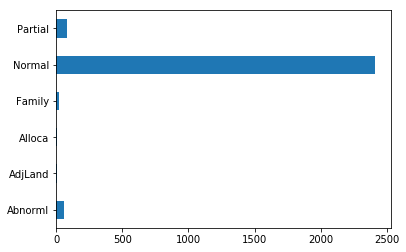

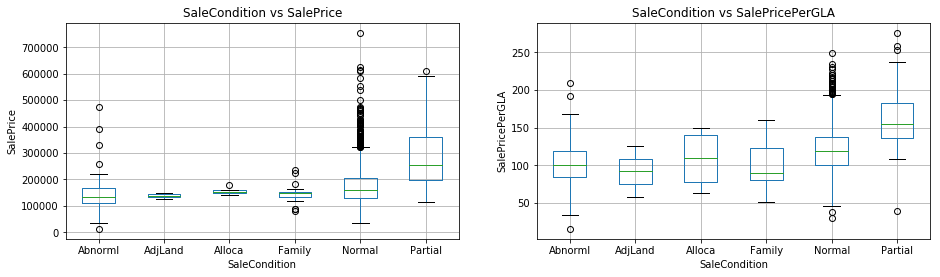

In [25]:
data.loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
#data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
SaleCondition,,,,,,,,,,,,,
Abnorml,1382.475410,143739.754098,69.944444,10263.131148,1960.245902,1976.622951,85.229508,481.150000,57.066667,468.516667,1006.733333,1120.327869,260.278689
AdjLand,1802.000000,138750.000000,49.000000,9365.000000,1949.000000,1962.500000,177.500000,673.500000,0.000000,462.500000,1136.000000,1154.000000,648.000000
Alloca,1599.000000,156766.500000,83.500000,11259.500000,1963.250000,1982.500000,34.500000,574.500000,0.000000,265.750000,840.250000,1097.500000,501.500000
Family,1563.941176,146958.823529,64.571429,12029.647059,1965.764706,1973.000000,170.000000,331.352941,40.823529,734.588235,1106.764706,1218.941176,319.352941
Normal,1477.410278,175567.643183,68.211519,10060.208040,1969.436386,1983.274347,96.081599,439.165769,55.124741,528.537091,1022.827600,1133.857024,339.242851
Partial,1784.841463,285172.121951,75.222222,11316.963415,2005.804878,2006.329268,195.632911,579.426829,2.060976,879.231707,1460.719512,1477.487805,307.353659


In [30]:
data[data["SaleCondition"]=="AdjLand"].iloc[:,0:14]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope
51,909176170,2592,150000,90,RL,60.0,10890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl
552,908103310,1012,127500,90,RL,38.0,7840,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl


ExterCond: Evaluates the present condition of the material on the exterior
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
Po	Poor
           ExterCond      SalePrice  SalePricePerGLA
ExterCond                                           
Ex                11  195913.636364       129.343992
Fa                56  112343.553571        84.039074
Gd               279  165535.322581       117.524921
Po                 2  117750.000000        61.977047
TA              2231  181234.282385       122.266636


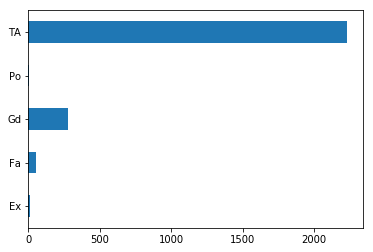

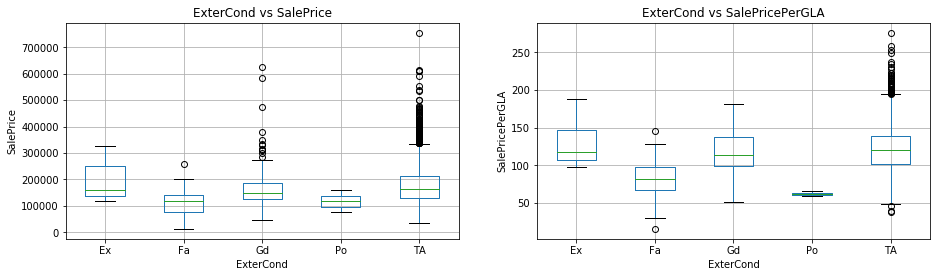

,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
ExterCond,,,,,,,,,,,,,
Ex,1537.727273,195913.636364,62.700000,10212.818182,1949.272727,1992.000000,70.636364,427.272727,178.090909,379.818182,985.181818,1069.727273,468.000000
Fa,1371.285714,112343.553571,66.980000,10497.839286,1933.892857,1962.696429,44.428571,258.178571,27.089286,562.053571,847.321429,1050.017857,305.875000
Gd,1452.673835,165535.322581,67.368889,10131.290323,1953.333333,1985.405018,78.089606,422.577061,78.426523,421.046595,922.050179,1078.684588,371.204301
Po,1869.000000,117750.000000,62.500000,6525.000000,1962.500000,1976.000000,0.000000,0.000000,0.000000,972.000000,972.000000,1261.000000,608.000000
TA,1492.391304,181234.282385,68.731148,10111.024653,1973.476020,1984.055132,103.641407,452.156951,50.200000,553.800448,1056.157399,1155.924697,332.292694


In [31]:
# Aleksey feature ExterCond
#print("")
print("ExterCond: Evaluates the present condition of the material on the exterior")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Average/Typical")
print("Fa	Fair")
print("Po	Poor")

feature = al_features[8]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

data.loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
#data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

GarageQual: Garage quality
Ex	Excellent
Gd	Good
TA	Typical/Average
Fa	Fair
Po	Poor
NA	No Garage
            GarageQual      SalePrice  SalePricePerGLA
GarageQual                                            
Ex                   3  241000.000000       144.701883
Fa                 110  118884.100000        95.473303
Gd                  22  242833.500000       134.050758
NoneListed         129  106814.604651        94.590424
Po                   4   94350.000000        81.785138
TA                2311  184292.841194       123.498335


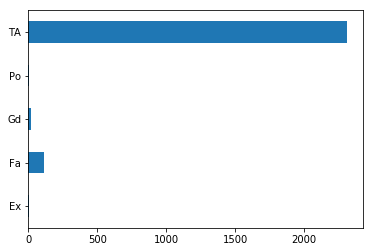

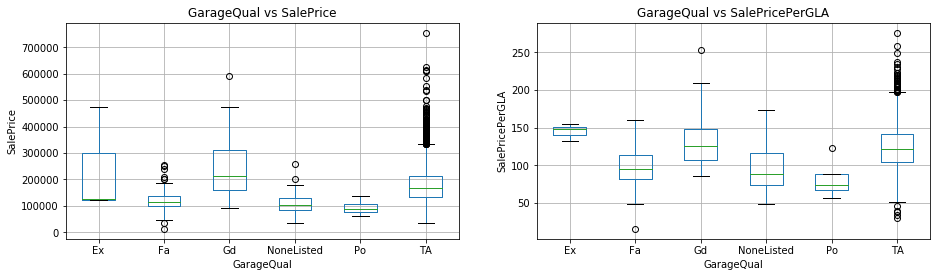

,GrLivArea,SalePrice,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF
GarageQual,,,,,,,
Ex,1750.000000,241000.000000,12983.333333,1930.333333,1969.000000,1053.333333,506.000000
Fa,1295.918182,118884.100000,8789.809091,1926.281818,1968.536364,909.009091,378.345455
Gd,1816.318182,242833.500000,12032.227273,1967.818182,1990.136364,1447.363636,362.590909
NoneListed,1199.170543,106814.604651,7650.798450,1943.899225,1974.798450,926.891473,260.341085
Po,1219.500000,94350.000000,8666.500000,1920.000000,1962.500000,763.750000,455.750000
TA,1507.977066,184292.841194,10300.925573,1974.060147,1984.985720,1166.289052,338.331458


In [42]:
# Aleksey feature GarageQual
#print("")
print("GarageQual: Garage quality")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Typical/Average")
print("Fa	Fair")
print("Po	Poor")
print("NA	No Garage")
    
feature = al_features[9]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data.replace(np.nan,"NoneListed")[[feature,"SalePrice", "SalePricePerGLA"]].groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))
# print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
#     by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

feature = "GarageQual"
fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

data.replace(np.nan,"NoneListed").loc[:,list(numericaldata.columns)[0:13]+[feature]].groupby(feature).mean()
#data.loc[:,list(numericaldata.columns)[14:27]+[feature]].groupby(feature).mean()

In [36]:
data.replace(np.nan,"NoneListed")[data["GarageQual"]=="NoneListed"].iloc[:,0:14]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope


In [35]:
print("Original size: ", data[[feature,"GarageQual"]].shape)
print("After NAs dropped: ", data[[feature,"GarageQual"]].dropna().shape)


Original size:  (2579, 2)
After NAs dropped:  (2450, 2)


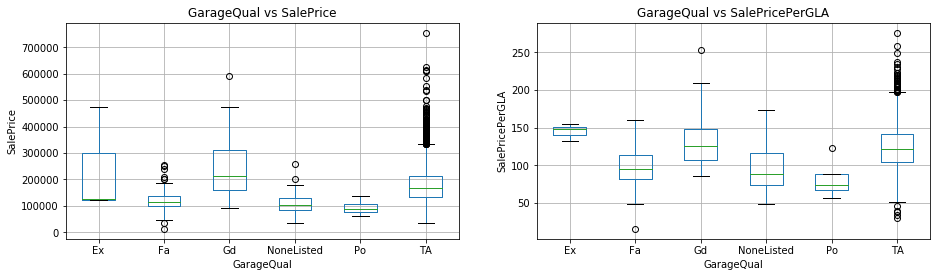

SaleCondition: Condition of sale
Normal	Normal Sale
Abnorml	Abnormal Sale -  trade, foreclosure, short sale
AdjLand	Adjoining Land Purchase
Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
Family	Sale between family members
Partial	Home was not completed when last assessed (associated with New Homes)
               SaleCondition      SalePrice  SalePricePerGLA
SaleCondition                                               
Abnorml                   61  143739.754098       103.796582
AdjLand                    2  138750.000000        91.929256
Alloca                     4  156766.500000       108.061200
Family                    17  146958.823529        98.136549
Normal                  2413  175567.643183       120.200702
Partial                   82  285172.121951       160.474809


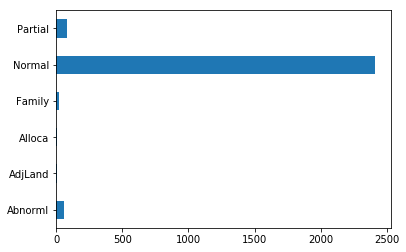

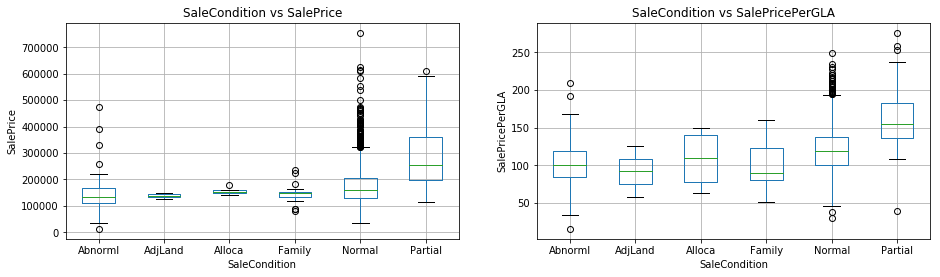

In [85]:
# Aleksey feature SaleCondition
#print("")
print("SaleCondition: Condition of sale")
print("Normal	Normal Sale")
print("Abnorml	Abnormal Sale -  trade, foreclosure, short sale")
print("AdjLand	Adjoining Land Purchase")
print("Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	")
print("Family	Sale between family members")
print("Partial	Home was not completed when last assessed (associated with New Homes)")

feature = cat_features[53]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()